# Chap13 - Convolutional Neural Networks

## 13.1 시각 피질의 구조

David H. Hubel과 Torsten Wiesel은 1958년과 1959년에 시각 피질의 구조에 대한 결정적인 통찰을 제공한 고양이 실험을 수행했다. 이들은 시각 피질 안의 많은 뉴런이 작은 **local receptive field**(국부 수용영역)을 가진다는 것을 보였으며, 이것은 뉴런들이 시야의 일부 범위 안에 있는 시각 자극에만 반응을 한다는 의미이다. 뉴런의 수용영역(receptive field)들은 서로 겹칠수 있으며, 이렇게 겹쳐진 수용영역들이 전체 시야를 이루게 된다. 추가적으로 어떤 뉴런은 수직선의 이미지에만 반응하고, 다른 뉴런은 다른 각도의 선에 반응하는 뉴런이 있을 뿐만아니라, 어떤 뉴런은 큰 수용영역을 가져 저수준의 패턴(edge, blob 등)이 조합되어 복잡한 패턴(texture, object)에 반응하다는 것을 알게 되었다.  이러한 관찰을 통해 고수준의 뉴런이 이웃한 저수준의 뉴런의 출력에 기반한다는 아이디어를 생각해 냈다. (아래 그림출처 : [brainconnection](https://brainconnection.brainhq.com/2004/03/06/overview-of-receptive-fields/))



![](./images/receptive.jpg)



이러한 아이디어가 바로 **합성곱 신경망(CNN, Convolutional Neural Network)**으로 점차 진화되어 왔으며, 1998년 Yann Lecn et al.의 논문에서 손글씨 숫자를 인식하는데 사용한 LeNet-5가 소개 되면서 CNN이 등장하게 되었다.

CNN의 구조는 아래의 그림과 같이 완전연결(fully connected)계층과는 달리 CNN은 **합성곱층(covolutional layer)**과 **풀링층(pooling layer)**으로 구성되어 있다.


![](./images/cnn-vs-fcn.png)

## 13.2 합성곱층 (Convolutional layer)


### 13.2.1 완전연결 계층의 문제점

완전연결 계층(fully connected layer)을 이용해 MNIST 데이터셋을 분류하는 모델을 만들 때,  3차원(세로, 가로, 채널)인 MNIST 데이터(28, 28, 1)를 입력층(input layer)에 넣어주기 위해서 아래의 그림(출처: [cntk.ai](https://cntk.ai/pythondocs/CNTK_103A_MNIST_DataLoader.html))처럼, 3차원 → 1차원의 평평한(flat) 데이터로 펼쳐줘야 했다.  즉, (28, 28, 1)의 3차원 데이터를 $28 \times 28 \times 1 = 784$의 1차원 데이터로 바꾼다음 입력층에 넣어줬다.



![](./images/mnist-fc.png)



이러한 완전연결 계층의 문제점은 바로 **'데이터의 형상이 무시'**된다는 것이다. 이미지 데이터의 경우 3차원(세로, 가로, 채널)의 형상을 가지며, 이 형상에는 **공간적 구조(spatial structure)**를 가진다. 예를 들어 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀끼리는 관련이 없는 등, 이미지 데이터는 3차원 공간에서 이러한 정보들이 내포 되어있다. 하지만, 완전연결 계층에서 1차원의 데이터로 펼치게 되면 이러한 정보들이 사라지게 된다.

### 13.2.2 합성곱층

합성곱층은 CNN에서 가장 중요한 구성요소이며, 13.2.1의 완전연결 계층과는 달리 **합성곱층(convolutional layer)**은 아래의 그림과 같이 입력 데이터의 형상을 유지한다. 3차원의 이미지 그대로 입력층에 입력받으며, 출력 또한 3차원 데이터로 출력하여 다음 계층(layer)으로 전달하기 때문에 CNN에서는 이미지 데이터처럼 형상을 가지는 데이터를 제대로 학습할 가능성이 높다고 할 수 있다.

   

![](./images/cnn.png)



합성곱층의 뉴런은 아래의 그림처럼(출처: [towardsdatascience.com](https://www.google.co.kr/url?sa=i&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwiisMajvYzeAhWBzbwKHQwADpsQjhx6BAgBEAM&url=https%3A%2F%2Ftowardsdatascience.com%2Fintuitively-understanding-convolutions-for-deep-learning-1f6f42faee1&psig=AOvVaw2rBeiGhqGeRHABcckWUyi1&ust=1539831412136958)) 입력 이미지의 모든 픽셀에 연결되는 것이 아니라 합성곱층 뉴런의 **수용영역(receptive field)안에 있는 픽셀에만 연결**이 되기 때문에, 앞의 합성곱층에서는 저수준 특성에 집중하고, 그 다음 합성곱층에서는 고수준 특성으로 조합해 나가도록 해준다. 

<img src="./images/conv-layer.gif" height="50%" width="50%" />

![](./images/cnn-network.png)

### 13.2.3 필터 (Filter)

위에서 설명한 수용영역(receptive field)을 합성곱층에서 **필터(filter)** 또는 커널(kernel)이라고 한다. 아래의 그림처럼, 이 필터가 바로 합성곱층에서의 가중치 파라미터($\mathbf{W}$)에 해당하며, 학습단계에서 적절한 필터를 찾도록 학습되며,  합성곱 층에서 입력데이터에 필터를 적용하여 필터와 유사한 이미지의 영역을 강조하는 **특성맵(feature map)**을 출력하여 다음 층(layer)으로 전달한다.

![](./images/filter.png)



그렇다면, 입력 데이터와 필터에 어떠한 연산을 통해 특성맵을 출력하는지에 대해 알아보도록 하자.

### 13.2.4 합성곱 (Convolution) vs. 교차 상관 (Cross-Correlation)

합성곱은 *'하나의 함수와 또 다른 함수를 **반전** 이동한 값을 곱한 다음, 구간에 대해 적분하여 새로운 함수를 구하는 연산자이다'* 라고 [wikipedia](https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1)에서 정의하고 있다. 합성곱 연산은 푸리에 변환(Fourier transform)과 라플라스 변환(Laplace transform)에 밀접한 관계가 있으며 신호 처리 분야에서 많이 사용된다. 


$$
\left( f * g \right)(t) = \int_{-\infty}^{\infty}{f(\tau)g(t-\tau)}d \tau
$$


이미지의 경우 2차원의 평면(높이 $h$, 너비 $w$)이며, 픽셀로 구성되어 있어 아래와 같이 ($\Sigma$)를 이용해 나타낼 수 있으며, 한 함수가 다른 함수 위를 이동하면서 원소별(element-wise) 곱셈의 합을 계산하는 연산이다.


$$
\left( f*g \right)(i, j) = \sum_{x=0}^{h-1}{\sum_{y=0}^{w-1}{f(x,y)g\left(i-x, j-y\right)}}
$$


합성곱과 매우 유사한 연산을 하는 **교차 상관(cross-correlation)**이 있는데, 교차상관의 식은 다음과 같다.


$$
\left( f * g \right)(t) = \int_{-\infty}^{\infty}{f(\tau)g(t+\tau)}d \tau
$$

$$
\left( f*g \right)(i, j) = \sum_{x=0}^{h-1}{\sum_{y=0}^{w-1}{f(x,y)g\left(i+x, j+y\right)}}
$$



합성곱과 교차상관의 차이는 한 함수(위에서 $g$)를 반전($-$)하는 것만 빼고는 동일한 함수이다. 

![convolution-vs-correlation](./images/conv-cross.PNG)



CNN의 합성곱층(convolutional layer)에서는 합성곱이 아닌, 교차상관(cross-correlation)을 사용하는데, 그 이유는 합성곱 연산을 하려면, 필터(filter/kernel)를 뒤집은(반전) 다음 적용해야 한다. 그런데, CNN에서는 필터의 값을 학습하는 것이 목적이기 때문에, 합성곱을 적용하는 것이나 교차상관을 적용하는 것이나 동일하다. 다만, 학습단계와 추론(inference) 단계에서 필터만 일정하면 된다. 이러한 이유로 [텐서플로](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d)나 다른 딥러닝 프레임워크들은 합성곱이 아닌 교차상관으로 합성곱층이 구현되어 있다(참고: [tensorflow.blog](https://tensorflow.blog/2017/12/21/convolution-vs-cross-correlation/)). 

### 13.2.5 합성곱층 연산

그럼, 합성곱 계층에서 연산이 어떻게 이루어지는지 알아보도록 하자. 데이터와 필터(또는 커널)의 모양을 (높이, 너비)로 나타내고, 윈도우(Window)라고 부른다. 여기서 입력 데이터는 (4, 4), 필터는 (3, 3)이고, 필터가 바로 **Conv Layer의 가중치에 해당**한다. 

합성곱 연산은 필터의 윈도우를 일정한 간격으로 이동해가며 계산한다. 아래의 그림처럼, 합성곱 연산은 입력데이터와 필터간에 서로 대응하는 원소끼리 곱한 후 총합을 구하게 되며, 이것을 Fused Multiply-Add(FMA)라고한다. 마지막으로 편향(bias)은 필터를 적용한 후에 더해주게 된다.



![convolution](./images/conv-op.png)




### 13.2.6 패딩 (padding)

패딩(Padding)은 합성곱 연산을 수행하기 전, 입력데이터 주변을 특정값으로 채워 늘리는 것을 말한다. 패딩(Padding)은 주로 출력데이터의 공간적(Spatial)크기를 조절하기 위해 사용한다. 패딩을 할 때 채울 값은 hyper-parameter로 어떤 값을 채울지 결정할 수 있지만, 주로 **zero-padding**을 사용한다. 

패딩을 사용하는 이유는 패딩을 사용하지 않을 경우, 데이터의 Spatial 크기는 Conv Layer를 지날 때 마다 작아지게 되므로, 가장자리의 정보들이 사라지는 문제가 발생하기 때문에 패딩을 사용하며, 주로 합성곱 계층의 출력이 입력 데이터의 공간적 크기와 동일하게 맞춰주기 위해 사용한다.

![padding](./images/padding.png)

### 13.2.7 스트라이드(Stride)

스트라이드는 입력데이터에 필터를 적용할 때 이동할 간격을 조절하는 것, 즉 **필터가 이동할 간격을 말한다**. 스트라이드 또한 출력 데이터의 크기를 조절하기 위해 사용한다. 스트라이드(Stride)는 보통 1과 같이 작은 값이 더 잘 작동하며, Stride가 1일 경우 입력 데이터의 spatial 크기는 pooling 계층에서만 조절하게 할 수 있다. 아래의 그림은 1폭 짜리 zero-padding과 Stride값을 1로 적용한 뒤 합성곱 연산을 수행하는 예제이다.

![convolution](./images/conv-layer2.gif)

### 13.2.8 출력 크기 계산

패딩과 스트라이드를 적용하고, 입력데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식은 아래와 같다.


$$
\left(\text{OH, OW} \right) = \left( \frac{\text{H} + 2\text{P} - \text{FH}}{\text{S}} +1, \frac{\text{W} + 2\text{P} - \text{FW}}{\text{S}} + 1 \right)
$$


- $(\text{H, W})$ : 입력 크기 (input size)
- $(\text{FH, FW})$ : 필터 크기 (filter/kernel size)
- $\text{S}$ : 스트라이드 (stride)
- $\text{P}$ : 패딩 (padding)
- $(\text{OH, OW})$ : 출력 크기 (output size)



아래의 그림은 패딩(padding) 1,  스트라이드(stride) 1 일때의 출력데이터 크기를  구한 예제다.  출력크기가 정수가 아닌 경우에는 에러가 발생할 수 있는데, 보통 딥러닝 프레임워크에서는 반올림을 통해 에러없이 작동한다.

![](./images/conv-output.PNG)
$$
\left(\text{OH, OW} \right) = \left( \frac{4 + 2 \times 1 - 3}{1} + 1, \frac{4 + 2 \times 1 - 3}{1} + 1 \right) = (4, 4)
$$


### 13.2.9 3차원 데이터의 합성곱

지금까지는 이미지 데이터에서 채널(channel)을 제외한 2차원(높이, 너비)의 형상에 대해 합성곱층에서의 연산에 대해 알아보았다. 이번에는 채널을 고려한 3차원 데이터에 대해 합성곱 연산을 알아보도록 하자. 예를 들어 아래의 그림(출처: [밑바닥부터 시작하는 딥러닝](https://github.com/WegraLee/deep-learning-from-scratch))처럼, 3개의 채널을 가지는 이미지의 다음과 같이 합성곱 연산을 수행할 수 있는데, 여기서 주의해야할 점은 합성곱 연산을 수행할 때, **입력 데이터의 채널 수와 필터의 채널수가 같아야 한다**.

![](./images/3d-conv.PNG)


#### 블록으로 생각하기

3차원의 합성곱 연산은 입력 데이터와 필터를 아래의 그림처럼 직육면체의 블록으로 생각하면 쉽다. 3차원 데이터의 모양은 `(높이, 너비, 채널) = (Height, Width, Channel)` 순으로 표현한다. 



![](./images/3d-conv02.PNG)



위의 그림에서 볼 수 있듯이, 3차원 입력 데이터에 하나의 필터를 이용해 합성곱 연산을 하게 되면 출력으로는 하나의 채널을 가지는 특성맵이다. 출력 데이터 또한 여러개의 채널을 가지는 특성맵을 내보내기 위해서는 여러개의 필터를 사용하면 된다. 아래의 그림은 `FN`개의 필터를 적용해 `FN`개의 채널을 가지는 특성맵을 출력으로 내보내는 예시이며, 합성곱 연산에서도 편향(bias)이 쓰이기 때문에 편향을 더해주기 위해 `(1, 1, FN)` 모양의 편향을 더해준 것이다.



![](./images/3d-conv03.PNG)


#### 수식으로 나타내기

위의 그림을 예를들어 구체적으로 살펴보면, 합성곱층 $l$에 있는 $k$개의 특성맵 $i$행, $j$열에 위치한 뉴런은 이전 층인 $l-1$ 층에 있는 모든 특성맵에서 $i \times s_h$에서 부터 $i \times s_h + f_h -1$까지의 행과 $j \times s_w$에서 부터 $j \times s_w + f_w -1$까지의 열에 있는 뉴런의 출력에 연결된다. 

- $s_h, s_w$ : 높이($h$), 너비($w$) 의 스트라이드
- $f_h, f_w$ : 필터의 높이($h$)와 너비($w$)



![](./images/3d-conv04.PNG)



합성곱층에서의 한 뉴런의 출력을 나타내는 위의 그림을 수식으로 정리하면 다음과 같다. 쉽게 생각하면 입력에 대한 가중치 합을 계산하고 편향($b$)를 더하는 것이다.


$$
z_{i,j,k} = b_{k} + \sum_{u=0}^{f_{h}-1}{\sum_{v=0}^{f_{w}-1}{\sum_{k'=0}^{f_{n'}-1}{x_{i',j',k'}\cdot w_{u, v, k', k}}}} \quad \text{with} \begin{cases} i' = i \times s_h + u \\ j' = j \times s_w + v \end{cases}
$$


- $z_{i,j,k}$ : 합성곱층($l$층)의 $k$-특성 맵에서 $i$행, $j$열에 위치한 뉴런의 출력
- $s_h, s_w$ : 높이($h$), 너비($w$) 의 스트라이드
- $f_h, f_w$ : 필터(receptive field)의 높이($h$)와 너비($w$)
- $f_{n'}$ : 이전 층 ($l-1$)에 있는 특성맵의 수
- $x_{i',j',k'}$ : $l-1$층의 $i'$행, $j'$열, $k'$ 특성맵에 있는 뉴런의 출력
- $b_k$ : $k$-특성맵의 편향(bias) → 이 편향을 $k$-특성맵의 전체 밝기를 조절하는 것으로 볼 수 있음
- $w_{u, v, k', k}$ : $l$층의 $k$-특성맵에 있는 필터와 연관된 $u$행, $v$열, $k'$특성맵의 뉴런의 가중치 

### 13.2.10 텐서플로에서의 합성곱층

텐서플로(TensorFlow)에서 각 입력이미지는 `[높이, 너비, 채널] = [H, W, CH]`형태의 3D 텐서([Tensor](http://excelsior-cjh.tistory.com/148?category=940399))로 표현되며, 미니배치(mini-batch)는 `[batch, H, W, CH]` 형태의 4D 텐서로 표현된다. 합성곱층에서의 필터(또는 커널)는 `[FH, FW, In_CH, Out_CH]=` $[f_h, f_w, f_{n'}, f_n]$ 형태의 4D 텐서로 표현된다. 

텐서플로에서는 [`tf.nn.conv2d()`](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)와 [`tf.layers.conv2d()`](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d)를 이용해 합성곱층을 구현할 수 있는데, 이 두 함수에 대해 알아보도록 하자.

#### tf.nn.conv2d

`tf.nn.conv2d()`함수는 다음과 같은 인자를 받도록 구성되어 있다.

```python
tf.nn.conv2d(
    input,
    filter,
    strides,
    padding,
    use_cudnn_on_gpu=True,
    data_format='NHWC',
    dilations=[1, 1, 1, 1],
    name=None
)
```



위의 인자에서 `filter`에 해당하는 부분을 사용자가 직접`[FH, FW, In_CH, Out_CH]` 형태의 4D 텐서로 만들어 줘야한다. `tf.nn.conv2d()`를 사용하기 위해서는 아래의 예제와 같은 과정이 필요하다.

```python
filter = tf.get_variable(name='W1', shape=[3, 3, 1, 32],  # [FH, FW, in_ch, out_ch]
                         initializer=tf.contrib.layers.xavier_initializer_conv2d())
conv = tf.nn.conv2d(inputs, filter, strides=[1, 1, 1, 1], padding='SAME')
```

`data_format`인자는 채널(`C`)의 위치를 앞에다 할것인지 뒤에다 할것인지 설정하는 인자이다. 디폴트로는 `NHWC`로 되어 있으며, 채널을 앞으로하고 싶을 경우 `NCHW`([batch, channels, height, width])로 변경할 수 있다.

`padding`인자는 `'SAME'`이나 `'VALID'`로 설정할 수 있으며, 이 둘의 차이는 다음과 같다.

- `'VALID'`: 합성곱층에 zero-padding을 사용하지 **않는다.** 그렇기 때문에 합성곱 연산을 통해 이미지의 데이터 손실이 일어난다.
- `'SAME'` : 합성곱층에 zero-padding을 사용하며, 이 경우에는 출력 특성맵의 크기는 입력을 스트라이드로 나눈 다음 올림 한 것과 같다(`ceil(13/5)=3`).

#### tf.layers.conv2d

`tf.layers.conv2d()`함수는 다음과 같은 인자를 받도록 구성되어 있다.

```python
tf.layers.conv2d(
    inputs,
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format='channels_last',
    dilation_rate=(1, 1),
    activation=None,
    use_bias=True,
    kernel_initializer=None,
    bias_initializer=tf.zeros_initializer(),
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    trainable=True,
    name=None,
    reuse=None
)
```



`tf.nn.conv2d()`에서 사용자가 직접 필터를 만들어 줘야 했지만, `tf.layers.conv2d()`는 필터를 간단하게 만들어 바로 합성곱층을 구현할 수 있다. 

```python
conv = tf.layers.conv2d(inputs, filters=32, kernel_size=3,  # or kernel_size=[3, 3]
                        padding='SAME')
```

### 13.2.11 합성곱층 예제 (1)

#### Set Up

In [2]:
import os
import numpy as np
import tensorflow as tf

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

흑백 이미지와 컬러 이미지를 그리기 위한 유틸리티 함수

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [5]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)
print('images.shape :', images.shape)

images.shape : (1, 70, 120, 1)


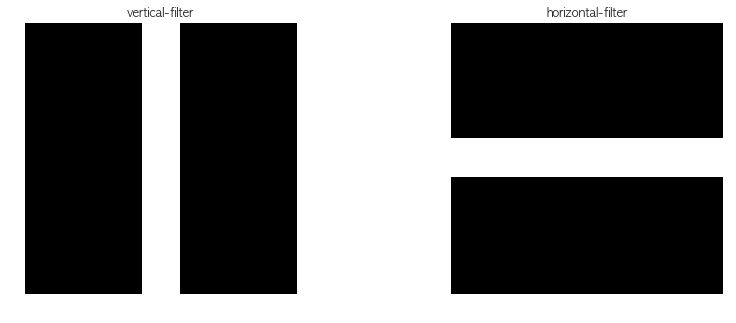

In [6]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1

# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    fmap[:, :, 0, 0],  # vertical-filter
    fmap[:, :, 0, 1],  # horizontal-filter
]

titles = ['vertical-filter', 'horizontal-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

In [7]:
reset_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, 1])
filters = tf.constant(fmap)
conv = tf.nn.conv2d(X, filters, strides=[1, 1, 1, 1], padding="SAME")

with tf.Session() as sess:
    output = conv.eval(feed_dict={X: images})
    
print('output.shape :', output.shape)

output.shape : (1, 70, 120, 2)


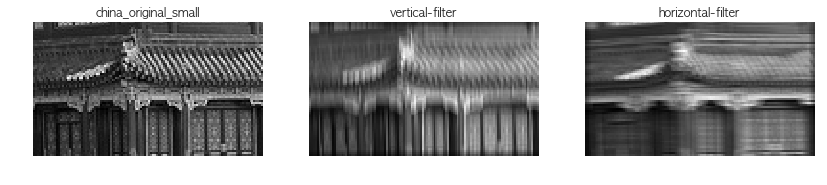

In [8]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
pl_images = [
    images[0, :, :, 0],  # original
    output[0, :, :, 0],  # vertical-filter
    output[0, :, :, 1],  # horizontal-filter
]

titles = ['china_original_small', 'vertical-filter', 'horizontal-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

### 13.2.12 합성곱층 예제 (2)

In [20]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg")
dataset = np.array(china, dtype=np.float32)
height, width, channels = dataset.shape
dataset = dataset.reshape([1, height, width, channels])

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

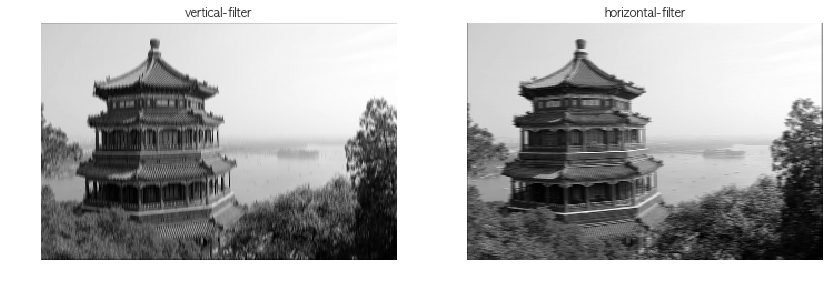

In [19]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    output[0, :, :, 0],  # vertical-filter
    output[0, :, :, 1],  # horizontal-filter
]

titles = ['vertical-filter', 'horizontal-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

#### tf.lyaers.conv2d() 사용하기

In [13]:
reset_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, channels])
conv =tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2, 2], padding='SAME', 
                       kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    output = conv.eval(feed_dict={X: dataset})

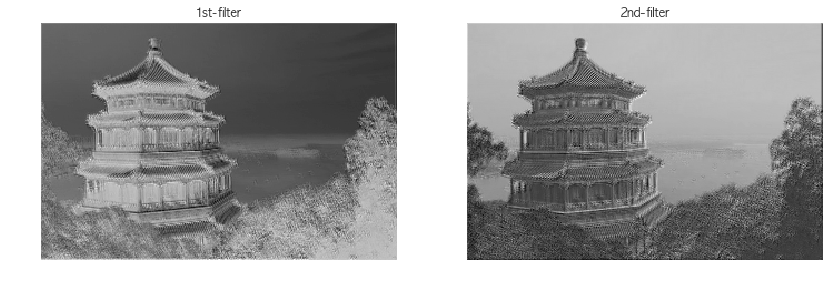

In [16]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    output[0, :, :, 0],  # vertical-filter
    output[0, :, :, 1],  # horizontal-filter
]

titles = ['1st-filter', '2nd-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

## 13.3 풀링층 (Pooling Layer)

### 13.3.1 풀링층이란

지금까지 합성곱층(convolutional layer)에 대해 알아보았다. 이제는 CNN의 또 다른 계층인 풀링층(Pooling Layer)에 대해 알아보도록 하자.

풀링의 배경에는 기술적인 이유와 이론적인 이유가 있다. 기술적 측면에서 풀링은 차례로 처리되는 데이터의 크기를 줄인다. 이 과정으로 모델의 전체 매개변수의 수를 크게 줄일 수 있다.  풀링에는 **Max-Pooling과 Average pooling**이 있는데 Max-Pooling은 해당영역에서 최대값을 찾는 방법이고, Average-Pooling은 해당영역의 평균값을 계산하는 방법이다. 이미지 인식 분야에서는 주로 Max-Pooling을 사용한다. 아래의 그림은 풀링의 윈도우 사이즈는 (2, 2)이며 스트라이드는 2로 설정하여 맥스풀링을 한 예제이다.

![](./images/pooling.png)



풀링의 이론적 측면은 계산된 특징이 이미지 내의 위치에 대한 변화에 영항을 덜 받기 때문이다. 예를 들어 이미지의 우측 상단에서 눈을 찾는 특징은, 눈이 이미지의 중앙에 위치하더라도 크게 영향을 받지 않아야 한다. 그렇기 때문에 풀링을 이용하여 불변성(invariance)을 찾아내서 공간적 변화를 극복할 수 있다.

![](./images/pooling02.png)

### 13.3.2 텐서플로에서의 풀링층

텐서플로에서는 [`tf.nn.max_pool()`](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool)과 [`tf.layers.max_pooling2d()`](https://www.tensorflow.org/api_docs/python/tf/layers/max_pooling2d)을 사용해 Max-Pooling을 구현할 수 있으며, Average-Pooling의 경우 [`tf.nn.avg_pool()`](https://www.tensorflow.org/api_docs/python/tf/nn/avg_pool)과 [`tf.layers.average_pooling2d`](https://www.tensorflow.org/api_docs/python/tf/layers/average_pooling2d) 로 구현할 수 있다. 여기에서는 Max-Pooling 구현에 대해 알아보도록 하자.

####  tf.nn.max_pool

`tf.nn.max_pool()` 함수는 다음과 같은 인자를 받도록 구성되어 있다.

```python
tf.nn.max_pool(
    value,
    ksize,
    strides,
    padding,
    data_format='NHWC',
    name=None
)
```

`ksize` 인자는 풀링크기를 지정하는 인자로써, `[batch, H, W, C]` 형태로 풀링 크기를 지정해줘야 한다. `tf.nn.max_pool()`을 이용해 풀링층을 다음과 같이 구현할 수 있다.

```python
tf.nn.max_pool(inputs, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
```

#### tf.layers.max_pooling2d

`tf.layers.max_pooling2d()` 함수는 다음과 같은 인자를 받도록 구성되어 있다.

```python
tf.layers.max_pooling2d(
    inputs,
    pool_size,
    strides,
    padding='valid',
    data_format='channels_last',
    name=None
)
```



이 함수를 이용해 다음과 같이 풀링층을 구현할 수 있다.

```python
tf.layers.max_pooling2d(inputs, pool_size=[2, 2], strides=[2, 2], padding='same')
```

### 13.3.3 풀링층 예제

#### tf.nn.max_pool 사용

In [42]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

print('dataset.shape :', dataset.shape)
print('output.shape (after max-pooling) :', output.shape)

dataset.shape : (1, 427, 640, 3)
output.shape (after max-pooling) : (1, 214, 320, 3)


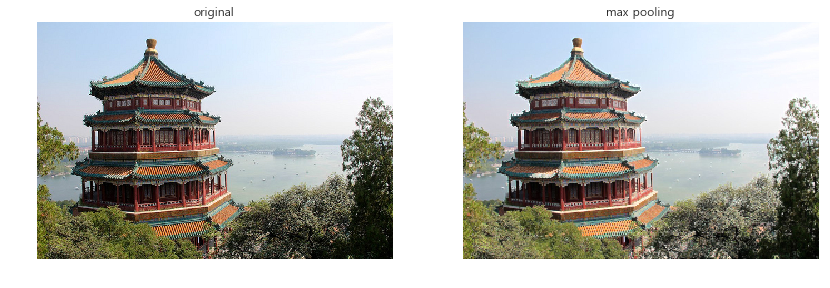

In [43]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    dataset[0],  # original
    output[0],  # max_pooling
]

titles = ['original', 'max pooling']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image.astype(np.uint8))
    axs[i].set_title(title)
    axs[i].axis('off')

#### tf.layers.max_pooling2d 사용

In [45]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.layers.max_pooling2d(X, pool_size=2, strides=2, padding='same')

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    output = sess.run(max_pool, feed_dict={X: dataset})

print('dataset.shape :', dataset.shape)
print('output.shape (after max-pooling) :', output.shape)

dataset.shape : (1, 427, 640, 3)
output.shape (after max-pooling) : (1, 214, 320, 3)


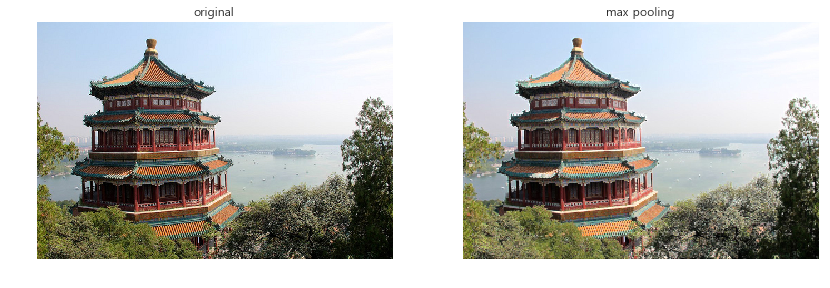

In [46]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    dataset[0],  # original
    output[0],  # max_pooling
]

titles = ['original', 'max pooling']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image.astype(np.uint8))
    axs[i].set_title(title)
    axs[i].axis('off')